In [1]:
import numpy as np 
import pandas as pd 
import os

TITANIC_DATA_PATH = "train.csv"

titanic_dataset = pd.read_csv(TITANIC_DATA_PATH)

## Learning the dataset

In [2]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


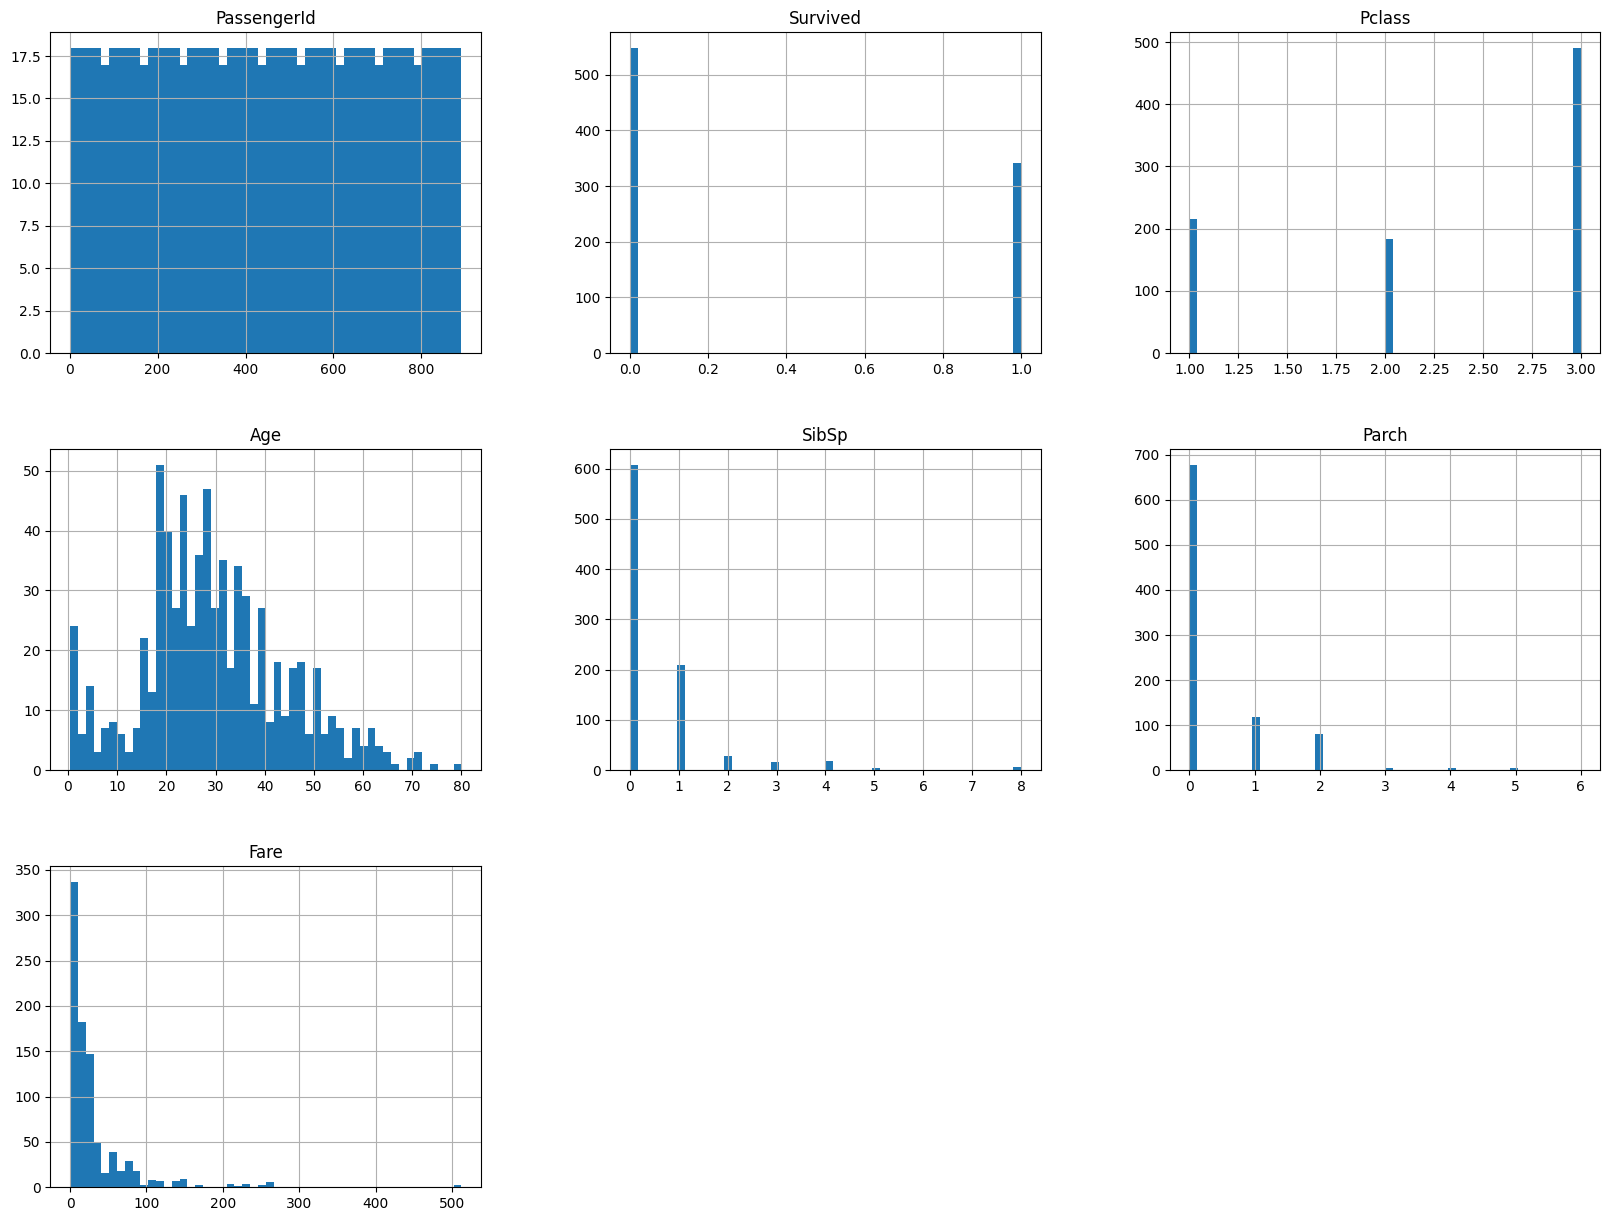

In [5]:
import matplotlib.pyplot as plt
titanic_dataset.hist(bins=50, figsize=(20,15))
plt.show()

## Processing and deleting some unimportant data

In [6]:
def preprocess(data):
    # Drop unnecesary data
    data.drop(columns=['Ticket'], inplace=True)
    data.drop(columns=['Cabin'], inplace=True)

    # Change name into title
    data['Title'] = data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
    data['Title'] = data['Title'].replace({
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Ms': 'Miss',
    'Lady': 'Rare',
    'the Countess': 'Rare',
    'Capt': 'Rare',
    'Col': 'Rare',
    'Don': 'Rare',
    'Dr': 'Rare',
    'Major': 'Rare',
    'Rev': 'Rare',
    'Sir': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare'
})
    data.drop(columns=['Name'], inplace=True)

    # data['Age'] = data['Age'].fillna(data['Age'].median())
    # data['Fare'] = data['Fare'].fillna(data['Fare'].median())
    # data['Age'] = data['Age'].fillna(data['Age'].median())

In [7]:
preprocess(titanic_dataset)

In [8]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


## Splitting the data stratisfiedly

In [9]:
titanic_dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index in sss.split(titanic_dataset, titanic_dataset["Sex"]):
    strat_train_set = titanic_dataset.loc[train_index]
    strat_test_set = titanic_dataset.loc[test_index]

In [11]:
strat_test_set['Sex'].value_counts()

Sex
male      116
female     63
Name: count, dtype: int64

In [12]:
titanic_dataset = strat_train_set.copy()

In [13]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 788 to 261
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          578 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     710 non-null    object 
 9   Title        712 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 61.2+ KB


## TURNING ALL STRING INTO NUMBER

In [14]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
788,789,1,3,male,1.0,1,2,20.5750,S,Master
347,348,1,3,female,NaN,1,0,16.1000,S,Mrs
629,630,0,3,male,NaN,0,0,7.7333,Q,Mr
734,735,0,2,male,23.0,0,0,13.0000,S,Mr
106,107,1,3,female,21.0,0,0,7.6500,S,Miss


In [15]:
titanic_dataset['Sex'] = (
    titanic_dataset['Sex']
    .str.strip()
    .str.lower()
    .map({'male': 1, 'female': 0})
)

In [16]:
titanic_dataset_embarked_title = titanic_dataset[['Embarked', 'Title']]
titanic_dataset_num = titanic_dataset.drop(columns=['Embarked', 'Title'])
titanic_dataset_embarked_title

,Embarked,Title
788,S,Master
347,S,Mrs
629,Q,Mr
734,S,Mr
106,S,Miss
...,...,...
263,S,Mr
628,S,Mr
711,S,Mr
453,C,Mr


In [17]:
titanic_dataset_num

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
788,789,1,3,1,1.0,1,2,20.5750
347,348,1,3,0,NaN,1,0,16.1000
629,630,0,3,1,NaN,0,0,7.7333
734,735,0,2,1,23.0,0,0,13.0000
106,107,1,3,0,21.0,0,0,7.6500
...,...,...,...,...,...,...,...,...
263,264,0,1,1,40.0,0,0,0.0000
628,629,0,3,1,26.0,0,0,7.8958
711,712,0,1,1,NaN,0,0,26.5500
453,454,1,1,1,49.0,1,0,89.1042


In [18]:
# from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder()
# titanic_dataset_1hot = cat_encoder.fit_transform(titanic_dataset_embarked_title)
# titanic_dataset_1hot

In [19]:
# titanic_dataset_1hot

In [20]:
# titanic_dataset_1hot.toarray()

In [21]:
# titanic_dataset_encoded = pd.get_dummies(titanic_dataset, columns=['Embarked', 'Title'])
# titanic_dataset_encoded

In [22]:
# titanic_dataset_encoded = titanic_dataset_encoded.replace({True: 1, False: 0})
# titanic_dataset_encoded

## Filling in the missing data

In [23]:
from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy="median")
# imputer.fit(titanic_dataset_num)
# imputer.statistics_

In [24]:
# titanic_dataset_num.isna().sum()

In [25]:
# titanic_dataset_num.median().values

In [26]:
# titanic_imputed = imputer.transform(titanic_dataset_num)

In [27]:
# titanic_imputed
# # Returns an array

In [28]:
# titanic_dataset_cleaned = pd.DataFrame(titanic_imputed, columns=titanic_dataset_num.columns, index=titanic_dataset_num.index)

In [29]:
# titanic_dataset_cleaned

## Separating data and label

In [30]:
titanic_dataset_prepared = titanic_dataset_num.drop("Survived", axis=1)
titanic_dataset_label = titanic_dataset_num["Survived"].copy()
titanic_dataset_label

788    1
347    1
629    0
734    0
106    1
      ..
263    0
628    0
711    0
453    1
261    1
Name: Survived, Length: 712, dtype: int64

In [31]:
titanic_dataset_prepared

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
788,789,3,1,1.0,1,2,20.5750
347,348,3,0,NaN,1,0,16.1000
629,630,3,1,NaN,0,0,7.7333
734,735,2,1,23.0,0,0,13.0000
106,107,3,0,21.0,0,0,7.6500
...,...,...,...,...,...,...,...
263,264,1,1,40.0,0,0,0.0000
628,629,3,1,26.0,0,0,7.8958
711,712,1,1,NaN,0,0,26.5500
453,454,1,1,49.0,1,0,89.1042


## Combining everything back together

In [32]:
titanic_dataset_final = titanic_dataset_prepared.join(titanic_dataset_embarked_title)
titanic_dataset_final

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
788,789,3,1,1.0,1,2,20.5750,S,Master
347,348,3,0,NaN,1,0,16.1000,S,Mrs
629,630,3,1,NaN,0,0,7.7333,Q,Mr
734,735,2,1,23.0,0,0,13.0000,S,Mr
106,107,3,0,21.0,0,0,7.6500,S,Miss
...,...,...,...,...,...,...,...,...,...
263,264,1,1,40.0,0,0,0.0000,S,Mr
628,629,3,1,26.0,0,0,7.8958,S,Mr
711,712,1,1,NaN,0,0,26.5500,S,Mr
453,454,1,1,49.0,1,0,89.1042,C,Mr


## Standardization

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

# titanic_training_dataset = num_pipeline.fit_transform(titanic_dataset_prepared)

In [34]:
# titanic_training_dataset

In [35]:
# titanic_dataset_cleaned = pd.DataFrame(titanic_training_dataset, columns=titanic_dataset_prepared.columns, index=titanic_dataset_prepared.index)
# titanic_dataset_cleaned

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attribs = titanic_dataset_final.select_dtypes(include="number").columns
cat_attribs = ["Embarked", "Title"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs)
])

titanic_dataset_train = full_pipeline.fit_transform(titanic_dataset_final)
titanic_dataset_train

array([[ 1.3225457 ,  0.80807448,  0.73788112, ...,  0.        ,
         0.        ,  0.        ],
       [-0.39609704,  0.80807448, -1.35523186, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.702899  ,  0.80807448,  0.73788112, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.02246522, -1.57926589,  0.73788112, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.01700077, -1.57926589,  0.73788112, ...,  1.        ,
         0.        ,  0.        ],
       [-0.73125185,  0.80807448,  0.73788112, ...,  0.        ,
         0.        ,  0.        ]], shape=(712, 16))

In [37]:
titanic_dataset = pd.DataFrame(
    titanic_dataset_train, columns= full_pipeline.get_feature_names_out(), index=titanic_dataset_final.index
)
titanic_dataset

,num__PassengerId,num__Pclass,num__Sex,num__Age,num__SibSp,num__Parch,num__Fare,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_nan,cat__Title_Master,cat__Title_Miss,cat__Title_Mr,cat__Title_Mrs,cat__Title_Rare
788,1.322546,0.808074,0.737881,-2.157097,0.408878,2.026471,-0.241462,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
347,-0.396097,0.808074,-1.355232,-0.109664,0.408878,-0.465493,-0.342373,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
629,0.702899,0.808074,0.737881,-0.109664,-0.492426,-0.465493,-0.531041,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
734,1.112100,-0.385596,0.737881,-0.488818,-0.492426,-0.465493,-0.412278,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
106,-1.335310,0.808074,-1.355232,-0.640480,-0.492426,-0.465493,-0.532920,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,-0.723458,-1.579266,0.737881,0.800306,-0.492426,-0.465493,-0.705427,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
628,0.699002,0.808074,0.737881,-0.261326,-0.492426,-0.465493,-0.527377,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
711,1.022465,-1.579266,0.737881,-0.109664,-0.492426,-0.465493,-0.106726,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
453,0.017001,-1.579266,0.737881,1.482784,0.408878,-0.465493,1.303866,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Training a model (Decision Tree)

In [44]:
# # Okay maybe let's not use linear regression
# from sklearn.linear_model import LinearRegression
# # titanic_dataset_prepared dataset buat latihan
# # titanic_dataset_label buat label
# lin_reg = LinearRegression()
# lin_reg.fit(titanic_dataset, titanic_dataset_label)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [47]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(titanic_dataset, titanic_dataset_label)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [53]:
some_data = titanic_dataset.iloc[:5]
some_labels = titanic_dataset_label.iloc[:5]

print("Predictions:", tree_reg.predict(some_data))
print("Labels: ", list(some_labels))
# some_data_prepared = full_pipeline.transform(some_data)

Predictions: [1. 1. 0. 0. 1.]
Labels:  [1, 1, 0, 0, 1]


### This is overfitting, since we are training and model evaluating using the same data

## Cross Validating